# Delaunay-Watershed for geometrical analysis

In this notebook, we present how to analyze polygonal lines to extract the geometry of the cells aggregates

## 1) Compute polygonal lines with Delaunay Watershed

Number of Nodes : 347  Number of Edges : 454


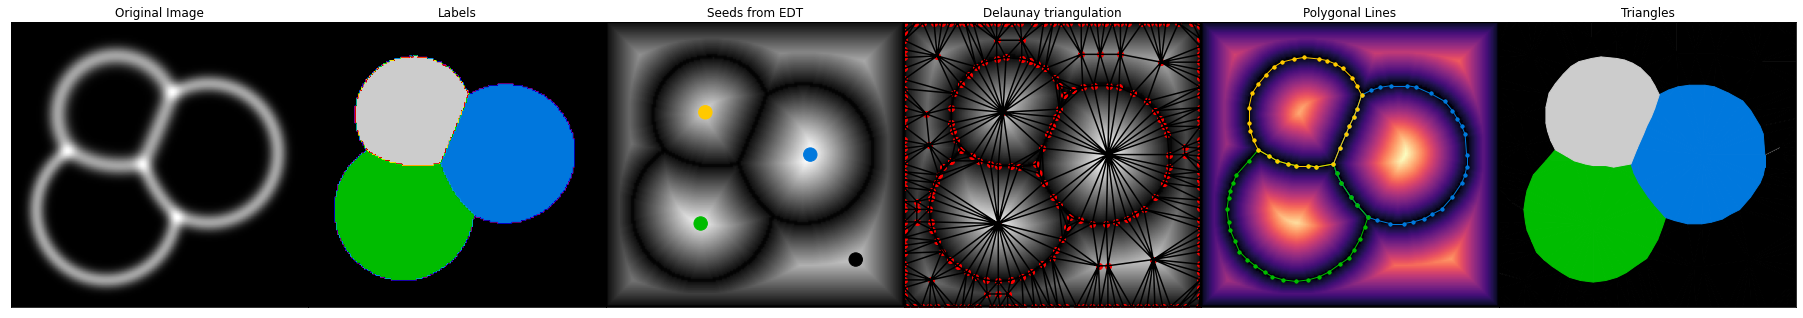

In [1]:
import skimage.io as io 
import numpy as np 
import matplotlib.pyplot as plt
from delaunay_watershed_2d import geometry_reconstruction_2d
def make_idx(n): 
    return(("000"+str(n))[-3:])

img = io.imread("Net_images/BW_images/CellCells_3.tif")
lbl = io.imread("Net_images/Masks/mask_Cells_3.tif")

DW = geometry_reconstruction_2d(lbl,expansion_labels=0, min_dist=5,original_image=img)
DW.extended_plot()

## 2) Export polygonal lines into a half-edge data structure suited for geometrical analysis

In [2]:
Mesh = DW.return_dcel()

In [3]:
Mesh.compute_lengths()

{(0, 1): 183.6305793992694,
 (0, 2): 181.07876167892948,
 (0, 4): 126.99311797707745,
 (1, 2): 41.02286693092996,
 (1, 4): 43.52242826156899,
 (2, 4): 48.8139960191471}

In [4]:
Mesh.compute_curvatures()

{(0, 1): 0.02297346050390694,
 (0, 2): 0.020867984424988585,
 (0, 4): 0.026052080180168555,
 (1, 2): 0.031987778273777086,
 (1, 4): 0.029115247587694792,
 (2, 4): 0.05579327242856628}

In [5]:
Mesh.compute_area_faces()

{0: -14892.0, 1: 5719.0, 2: 5316.0, 4: 3857.0}

In [6]:
Mesh.compute_angles()

{(0, 1, 2): 2.611376880813163,
 (0, 2, 4): 1.760276484676044,
 (0, 4, 1): 2.356194490192345,
 (1, 0, 4): 1.5707963267948966,
 (1, 2, 0): 2.1010120995715265,
 (1, 4, 2): 2.1311562036997396,
 (2, 0, 1): 1.5707963267948966,
 (2, 1, 4): 2.439335722080786,
 (2, 4, 0): 2.553590050042226,
 (4, 0, 2): 1.9693187724613168,
 (4, 1, 0): 2.356194490192345,
 (4, 2, 1): 1.7126933813990606}

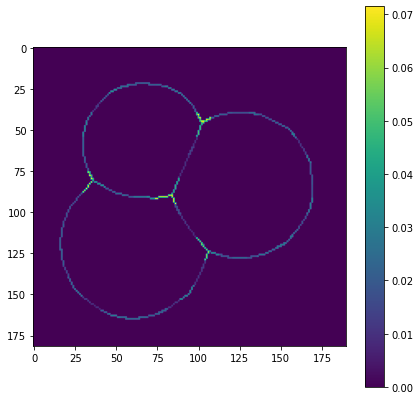

In [7]:
Mesh.plot_local_curvature(lbl)

## 3) Plot and save the polylines : 

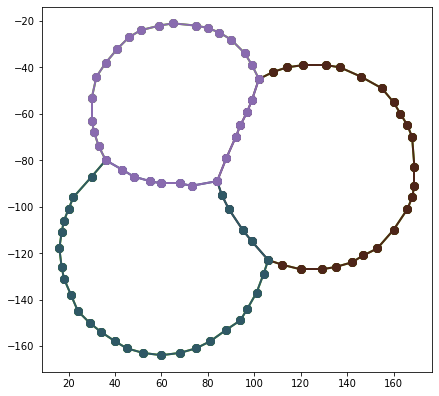

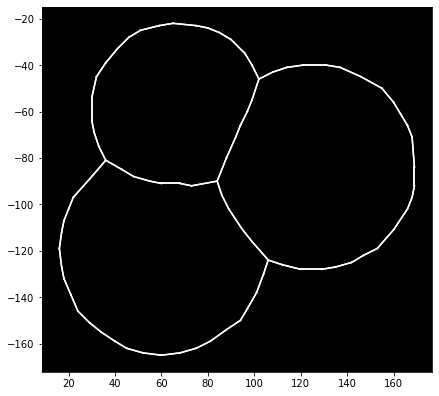

In [8]:
Mesh.plot_polyline()
Mesh.plot_bw()

In [9]:
DW.export_mesh("mesh.rec",mode = 'txt')
from Dcel import read_rec_file_bin,read_rec_file_num
verts,edges,ns = read_rec_file_num("mesh.rec")